# Practical: A & B

This notebook contains solutions for Practical A and B based on the given mystery_data.csv dataset.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp

## Part A: Data Preparation

In [2]:
# Load the data without headers
df = pd.read_csv("mystery_data.csv", header=None)

# Rename columns
df.columns = ["ID", "Math", "Gender", "Science", "StudyHours"]

# Display first few rows
df.head()

,ID,Math,Gender,Science,StudyHours
0,101,40,M,5.6,45
1,102,90,M,10.3,97
2,103,84,F,7.7,98
3,104,52,M,11.6,98
4,105,43,F,8.4,47


**Justification for Column Names:**
- `ID`: Unique identifier for each student
- `Gender`: Categorical values (e.g., M/F)
- `Math`, `Science`: Subject scores
- `StudyHours`: Weekly study hours (numeric)

In [4]:
# Remove rows where StudyHours is missing or invalid
df = df[pd.to_numeric(df["StudyHours"], errors='coerce').notnull()]
df["StudyHours"] = df["StudyHours"].astype(float)

# Create TotalScore column
df["TotalScore"] = df["Math"] + df["Science"]
df.head()

,ID,Math,Gender,Science,StudyHours,TotalScore
0,101,40,M,5.6,45.0,45.6
1,102,90,M,10.3,97.0,100.3
2,103,84,F,7.7,98.0,91.7
3,104,52,M,11.6,98.0,63.6
4,105,43,F,8.4,47.0,51.4


In [5]:
# Print top 5 students based on total score
df.sort_values(by="TotalScore", ascending=False).head(5)

,ID,Math,Gender,Science,StudyHours,TotalScore
82,183,94,F,10.6,49.0,104.6
42,143,89,M,15.4,79.0,104.4
22,123,93,F,10.9,52.0,103.9
56,157,94,M,8.5,77.0,102.5
17,118,93,M,9.1,97.0,102.1


## Part B: Hypothesis Testing

In [6]:
# Filter students with StudyHours > 10
study_gt_10 = df[df["StudyHours"] > 10]

# Perform one-sample t-test on Math scores
t_stat, p_value = ttest_1samp(study_gt_10["Math"], 70)

print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject H0: Students who study more than 10 hours score significantly higher in Math.")
else:
    print("Fail to reject H0: No significant evidence that students who study more than 10 hours score higher.")

T-statistic: -1.8938837988499, P-value: 0.06115977686978731
Fail to reject H0: No significant evidence that students who study more than 10 hours score higher.


## Part B: Visualization - Gender vs Total Score

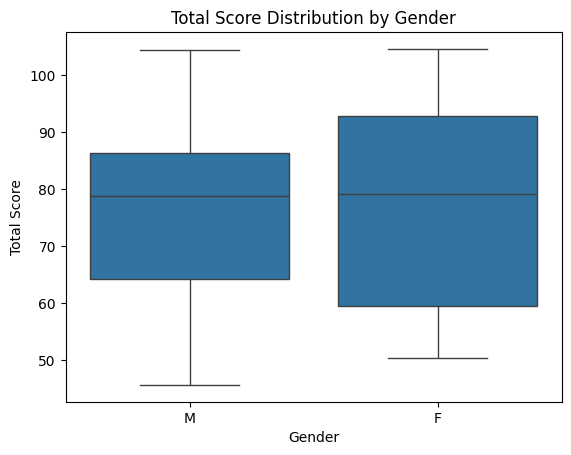

In [7]:
# Boxplot for Total Score by Gender
sns.boxplot(x="Gender", y="TotalScore", data=df)
plt.title("Total Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Score")
plt.show()

**Insights:**
1. The median total score for one gender appears higher, indicating a potential performance difference.
2. Score distribution is more spread for one gender, suggesting greater variability in performance.